# Корреляция и корреляционный анализ. ДЗ в рамках курса Нетологии "Data Scientist: с нуля до middle"

In [82]:
#Задание 1.
'''Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков'''


from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('water.csv', index_col=0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


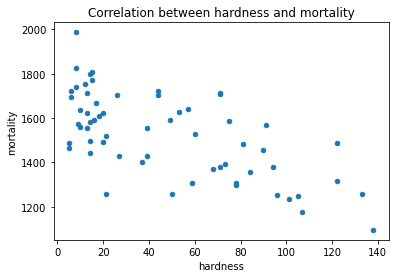

In [226]:
# посмотрим на взимосвязь между жёсткостью воды и средней годовой смертностью
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality')
plt.show()

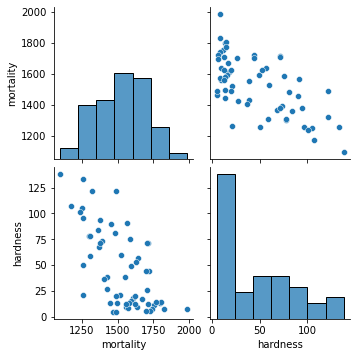

In [227]:
sns.pairplot(df)

In [228]:
df_stat = df.describe()
#Поиск выбросов через межквартальный размах
#Расчет границ для определения выбросов
df_stat.loc['lower_bound ',] = df_stat.loc['25%', ] - 1.5*(df_stat.loc['75%', ] - (df_stat.loc['25%', ]))
df_stat.loc['upper_bound ',] = df_stat.loc['75%', ] + 1.5*(df_stat.loc['75%', ] - (df_stat.loc['25%', ]))

df_stat

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000
lower_bound,945.500000,-77.500000
upper_bound,2101.500000,166.500000


In [229]:
remove_outliers = df[df['mortality'].between(df_stat.loc['lower_bound ','mortality'], df_stat.loc['upper_bound ','mortality'], inclusive=True)].sort_values('mortality')

pd.concat([df, remove_outliers]).drop_duplicates(keep=False)


,location,town,mortality,hardness


In [6]:
remove_outliers = df[df['hardness'].between(df_stat.loc['lower_bound ','hardness'], df_stat.loc['upper_bound ','hardness'], inclusive=True)].sort_values('hardness')

pd.concat([df, remove_outliers]).drop_duplicates(keep=False)

,location,town,mortality,hardness


<AxesSubplot:>

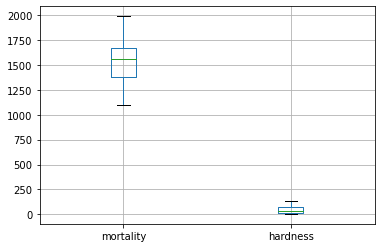

In [233]:
numeric = ['mortality', 'hardness']
df.boxplot(numeric)


Считаем, что выбросы не обнаружены

In [462]:
#Коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [463]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Исходя из рассчитанных коэффициентов корреляции можно предположить, 
что между жёсткостью воды и средней годовой смертностью существует обратная (т.к. коэффициенты < 0) средняя линейная связь, т.е. при увеличении значений одной из величин значения другой имеют тенденцию к уменьшению

In [774]:
#Построим модель линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [775]:
x = df[['hardness'] ]
y = df['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.26, random_state = 37)


In [776]:
model = LinearRegression()
model.fit(x_train, y_train)# метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [906]:
model.coef_

array([-2.51131679])

In [777]:
model.intercept_ #точка, в которой линия регрессии пересекает ось y

1660.4110089953106

In [778]:
y_pred = model.predict(x_test)
y_pred

array([1636.46100238, 1295.1734081 , 1435.87969697, 1642.44850403,
       1549.6422284 , 1408.93593953, 1618.49849742, 1346.06717216,
       1630.47350073, 1615.50474659, 1426.89844449, 1456.83595276,
       1582.57348749, 1489.76721186, 1543.65472674, 1262.24214901])

In [782]:
res_df = x_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
30,8,1636.461002,1828
19,122,1295.173408,1318
50,75,1435.879697,1587
37,6,1642.448504,1724
28,37,1549.642228,1402
10,84,1408.935940,1359
33,14,1618.498497,1581
1,105,1346.067172,1247
6,10,1630.473501,1558
7,15,1615.504747,1807


In [779]:
#Вычислим коэффициент детерминации
model.score(x_test, y_test) 

#т.е. в 64.2% случаев изменения х приводят к изменению y

0.6421101145739093

Text(0.5, 1.0, 'Линия регрессии')

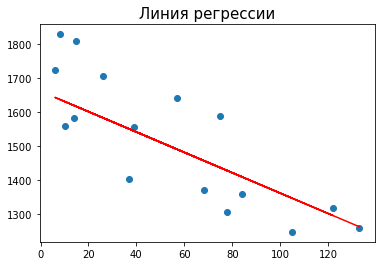

In [808]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.title('Линия регрессии', fontsize=15)

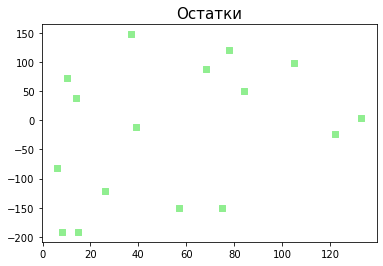

In [806]:

plt.title('Остатки', fontsize=15)
plt.scatter(x_test, y_pred-y_test, c='lightgreen', marker='s')

In [810]:
#Задание 2.
'''Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
'''
df_south = df.query("location == 'South'")
df_north = df.query("location == 'North'")


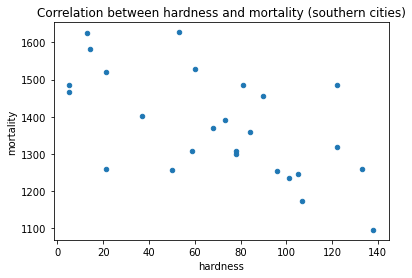

In [809]:
# посмотрим на взимосвязь между жёсткостью воды и средней годовой смертностью для южных городов
df_south.plot(kind='scatter', 
        x = 'hardness', 
        y = 'mortality', 
        title='Correlation between hardness and mortality (southern cities)')
plt.show()

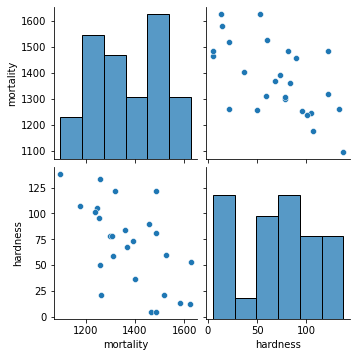

In [811]:
sns.pairplot(df_south)

In [812]:
#Поиск выбросов через межквартальный размах
#Расчет границ для определения выбросов
df_south_stat = df_south.describe()
df_south_stat.loc['lower_bound ',] = df_south_stat.loc['25%', ] - 1.5*(df_south_stat.loc['75%', ] - (df_south_stat.loc['25%', ]))
df_south_stat.loc['upper_bound ',] = df_south_stat.loc['75%', ] + 1.5*(df_south_stat.loc['75%', ] - (df_south_stat.loc['25%', ]))

df_south_stat

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000
lower_bound,919.500000,-49.000000
upper_bound,1825.500000,189.000000


In [813]:
remove_outliers = df_south[df_south['mortality'].between(df_south_stat.loc['lower_bound ','mortality'], df_south_stat.loc['upper_bound ','mortality'], inclusive=True)].sort_values('mortality')

pd.concat([df_south, remove_outliers]).drop_duplicates(keep=False)


,location,town,mortality,hardness


In [814]:
remove_outliers = df_south[df_south['hardness'].between(df_south_stat.loc['lower_bound ','hardness'], df_south_stat.loc['upper_bound ','hardness'], inclusive=True)].sort_values('hardness')

pd.concat([df_south, remove_outliers]).drop_duplicates(keep=False)

,location,town,mortality,hardness


<AxesSubplot:>

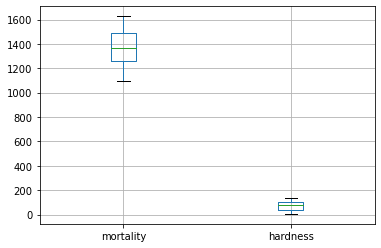

In [816]:
numeric = ['mortality', 'hardness']
df_south.boxplot(numeric)

Считаем, что выбросы не обнаружены

In [817]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [818]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Исходя из рассчитанных коэффициентов корреляции можно сделать вывод, что между жёсткостью воды и средней годовой смертностью для южных городов сохраняется обратная (т.к. коэффициенты < 0) средняя линейная связь, т.е. при увеличении значений одной из величин значения другой имеют тенденцию к уменьшению

In [1328]:
x = df_south[['hardness'] ]
y = df_south['mortality']

#поскольку выборка содержит мало данных, увеличим количество точек для тренировки модели
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.24, random_state = 23)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [1329]:
model.coef_


array([-1.93871177])

In [1330]:
model.intercept_ 

1501.7582095676655

In [1331]:
y_pred = model.predict(x_test)
y_pred

array([1305.94832047, 1476.55495652, 1360.23225012, 1338.90642062,
       1327.27414998, 1492.0646507 , 1243.90954373])

In [1333]:
#Вычислим коэффициент детерминации
model.score(x_test, y_test) 


#т.е. в 58.8% случаев изменения х приводят к изменению y

0.5880119874644103

In [1334]:
res_df = x_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
42,101,1305.948320,1236
55,13,1476.554957,1625
11,73,1360.232250,1392
10,84,1338.906421,1359
40,90,1327.274150,1456
39,5,1492.064651,1486
35,133,1243.909544,1259


Text(0.5, 1.0, 'Линия регрессии')

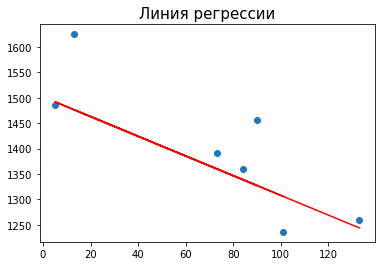

In [1335]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.title('Линия регрессии', fontsize=15)

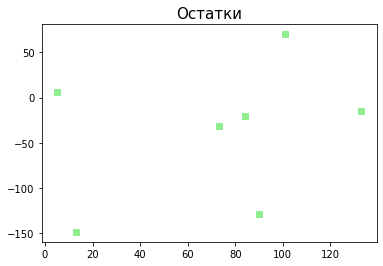

In [1336]:

plt.title('Остатки', fontsize=15)
plt.scatter(x_test, y_pred-y_test, c='lightgreen', marker='s')

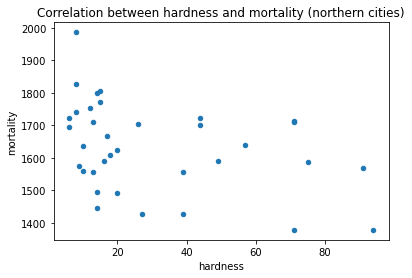

In [1337]:
# посмотрим на взимосвязь между жёсткостью воды и средней годовой смертностью для северных городов
df_north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality (northern cities)')
plt.show()

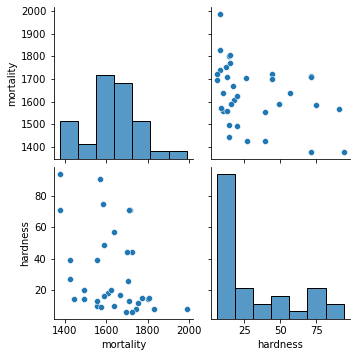

In [1519]:
sns.pairplot(df_north)

In [1341]:
#Поиск выбросов через межквартальный размах
#Расчет границ для определения выбросов
df_north_stat = df_north.describe()
df_north_stat.loc['lower_bound ',] = df_north_stat.loc['25%', ] - 1.5*(df_north_stat.loc['75%', ] - (df_north_stat.loc['25%', ]))
df_north_stat.loc['upper_bound ',] = df_north_stat.loc['75%', ] + 1.5*(df_north_stat.loc['75%', ] - (df_north_stat.loc['25%', ]))

df_north_stat

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000
lower_bound,1316.750000,-34.750000
upper_bound,1958.750000,91.250000


In [1342]:
remove_outliers = df_north[df_north['mortality'].between(df_north_stat.loc['lower_bound ','mortality'], df_north_stat.loc['upper_bound ','mortality'], inclusive=True)].sort_values('mortality')

pd.concat([df_north, remove_outliers]).drop_duplicates(keep=False)

,location,town,mortality,hardness
46,North,Salford,1987,8


In [1343]:
remove_outliers = df_north[df_north['hardness'].between(df_north_stat.loc['lower_bound ','hardness'], df_north_stat.loc['upper_bound ','hardness'], inclusive=True)].sort_values('hardness')

pd.concat([df_north, remove_outliers]).drop_duplicates(keep=False)

,location,town,mortality,hardness
22,North,Grimsby,1379,94


<AxesSubplot:>

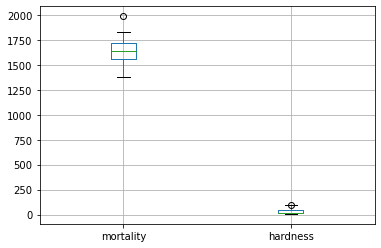

In [1344]:
numeric = ['mortality', 'hardness']
df_north.boxplot(numeric)

In [1350]:
#подчистим обнаруженные выбросы и посмотрим как меняется корреляция
df_north_work = df_north[~df_north['mortality'].isin([1987])& ~df_north['hardness'].isin([94])]


In [1520]:
df_north_work[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.228538
hardness,-0.228538,1.000000


In [1521]:
df_north_work[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.298385
hardness,-0.298385,1.000000


In [1522]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [1523]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Исходя из рассчитанных коэффициентов корреляции можно сделать вывод, что между жёсткостью воды и средней годовой смертностью для южных городов сохраняется обратная (т.к. коэффициенты < 0) слабая(в сравнении с предыдущими исследованиями) линейная связь. При этом обнаружены точки-выбросы, оказывающие влияние на корреляцию

In [1512]:
#Построим модель линейной регрессии
x = df_north_work [['hardness']]
y = df_north_work ['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.24, random_state = 13)

In [1513]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [1514]:
model.coef_

array([-0.39037874])

In [1515]:
model.intercept_

1648.1089956664857

In [1516]:
y_pred = model.predict(x_test)
y_pred

array([1643.03407205, 1640.30142088, 1632.88422483, 1628.98043743,
       1620.39210516, 1642.64369331, 1625.85740752, 1637.95914844])

In [1517]:
model.score(x_test, y_test)#получился крайне низкий коэффициент детерминации, 
#возможно потому, что данные имеют нелинейную связь

0.03846607895270204

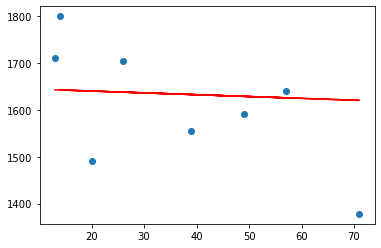

In [1518]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

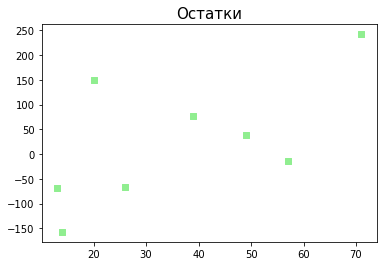

In [1524]:
plt.title('Остатки', fontsize=15)
plt.scatter(x_test, y_pred-y_test, c='lightgreen', marker='s')

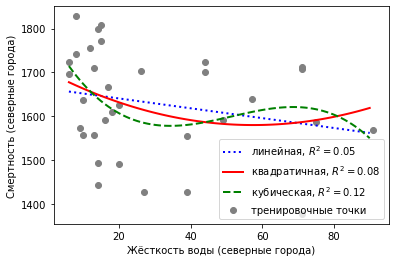

In [1537]:
#посмотрим на модель полиномиальной регрессии

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

x = df_north_work[['hardness']].values
y = df_north_work['mortality'].values
regr = LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
x_quad = quadratic.fit_transform(x)
x_cubic = cubic.fit_transform(x)

#линейная подгонка
x_fit = np.arange(x.min(), x.max(), 1)[:, np.newaxis]
regr = regr.fit(x,y)
y_lin_fit = regr.predict(x_fit)
linear_r2 = r2_score(y, regr.predict(x))

#квадратичная подгонка
regr = regr.fit(x_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(x_fit))
quadratic_r2 = r2_score(y, regr.predict(x_quad))

#кубическая подгонка
regr = regr.fit(x_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(x_fit))
cubic_r2 = r2_score(y, regr.predict(x_cubic))

#графики
plt.scatter(x, y, label = 'тренировочные точки',color = 'gray')
plt.plot(x_fit, y_lin_fit, label = 'линейная, $R^2=%.2f$'% linear_r2, color = 'blue', lw=2, linestyle = ':')
plt.plot(x_fit, y_quad_fit, label = 'квадратичная, $R^2=%.2f$'% quadratic_r2, color = 'red', lw=2, linestyle = '-')
plt.plot(x_fit, y_cubic_fit, label = 'кубическая, $R^2=%.2f$'% cubic_r2, color = 'green', lw=2, linestyle = '--')
plt.xlabel('Жёсткость воды (северные города)')
plt.ylabel('Смертность (северные города)')
plt.legend(loc = 'best')
plt.show()

Кубическая функция чуть лучше описывает зависимость смертности в северных городах от жесткости воды. Таким образом, некая обратная линейная зависимость между смертностью и жесткостью воды, прослеживаемая в выборках в целом по датафрейму и в разрезе южных городов, не подтверждается в разрезе северных городов.